In [1]:
#Imports

from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [2]:
#Define constants
s = tf([1,0], [1])
K1 =1


H1 = tf([0.4, 1], [1, 3, 6, 0])
H2 = K1/(1+0.1*s)

In [6]:
#Question 4.1_tf_1
Y_U = H1.feedback(H2)

print(Y_U)

print(Y_U.num[0])
print(Y_U.den[0])


         0.04 s^2 + 0.5 s + 1
---------------------------------------
0.1 s^4 + 1.3 s^3 + 3.6 s^2 + 6.4 s + 1

[array([0.04, 0.5 , 1.  ])]
[array([0.1, 1.3, 3.6, 6.4, 1. ])]


In [9]:
#Question 4.1_tf_2
K1 = 5
K2 = 2.5

H1 = K1/(2+s)
H2 = tf([0.4, 1], [1, 3, 6])
H3 = K2/(9+s)

G = (H1 + H3).minreal()
Y_U = (H2*G).minreal()

print(Y_U)

print(Y_U.num[0])
print(Y_U.den[0])


        3 s^2 + 27.5 s + 50
-----------------------------------
s^4 + 14 s^3 + 57 s^2 + 120 s + 108

[array([ 3. , 27.5, 50. ])]
[array([  1.,  14.,  57., 120., 108.])]


In [17]:
#Questions 4.1_tf_4
K1 = 1

H1 = tf([5], [1, 3, 5])
G = K1*(1+(0.2/s))
one = tf([1], [1])
print(one)

#1
U_Y_cl = (G*H1).feedback(1)
print("Input to Output, Closed Loop =", U_Y_cl)

#2
U_E_cl = (G).feedback(H1)
print("Input to Control Input Closed Loop=", U_E_cl)

#3
D_Y_cl = H1.feedback(G)
print("Distrubance to Output Closed Loop =", D_Y_cl)

#4
D_U_cl = (one).feedback(G*H1)
print("Distrubance to Control Input =", D_U_cl)




1
-
1

Input to Output, Closed Loop = 
       5 s + 1
----------------------
s^3 + 3 s^2 + 10 s + 1

Input to Control Input Closed Loop= 
s^3 + 3.2 s^2 + 5.6 s + 1
-------------------------
 s^3 + 3 s^2 + 10 s + 1

Distrubance to Output Closed Loop = 
         5 s
----------------------
s^3 + 3 s^2 + 10 s + 1

Distrubance to Output Closed Loop = 
  s^3 + 3 s^2 + 5 s
----------------------
s^3 + 3 s^2 + 10 s + 1



4.2

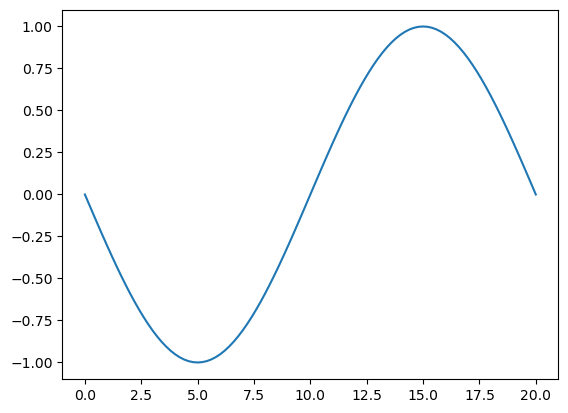

In [19]:
#Question 4.2_signal_1

t= np.arange(0, 20.2, 0.2)
y = np.sin(2*np.pi*4.95*t)

plt.figure()
plt.plot(t,y)
plt.show()


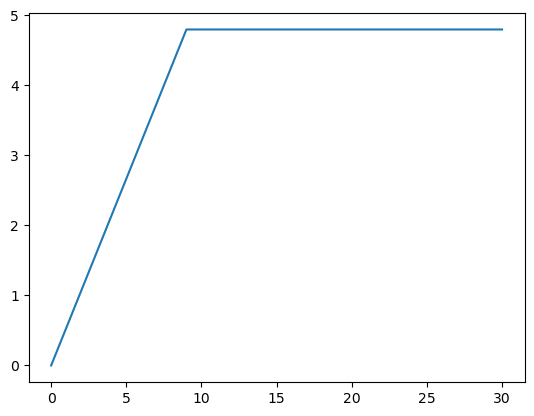

In [23]:
#Questions 4.2_signal_2

t = np.arange(0, 30.15, 0.15)

ramp_size = 4.8
rampend = 9

u = np.minimum(t*ramp_size/rampend, 1.*ramp_size)


plt.plot(t,u)
plt.show()


4.3

In [24]:
#Question 4.3_time_1

Y = 1/(2*s*s + 5*s + 20)
print(Y)

print(Y.num[0])
print(Y.den[0])



       1
----------------
2 s^2 + 5 s + 20

[array([1])]
[array([ 2,  5, 20])]


In [36]:
#Question 4.3_time_2

print(stepinfo(Y, SettlingTimeThreshold=0.05))

t = np.arange(0, 10, 0.001)

y1, t = step(Y,t)

f = 1/20

print("Settling Time =", t[np.logical_or(y1 > 1.05*f, y1 < 0.95*f)][-1])
print("Maximum Overshoot =", np.max(y1)/f - 1)
print("Rise Time 10% --> 90% =", (t[y1>0.9*f])[0] - (t[y1>0.1*f])[0])
print("Delay Time 10% =", (t[y1>0.1*f])[0])

{'RiseTime': 0.4465619574291483, 'SettlingTime': 2.4560907658603157, 'SettlingMin': 0.0451390924435174, 'SettlingMax': 0.06290816953077633, 'Overshoot': 25.816339061552647, 'Undershoot': 0, 'Peak': 0.06290816953077633, 'PeakTime': 1.0605846488942272, 'SteadyStateValue': 0.05}
Settling Time = 2.418
Maximum Overshoot = 0.2587411136387112
Rise Time 10% --> 90% = 0.46099999999999997
Delay Time 10% = 0.152


In [44]:
#Question 4.3_time_3
K = 1.5

H = 9/(s*(s+1.4))
G = K/(s+10)

tf_cl = (H*G).feedback(1)

print(tf_cl)

t = np.arange(0, 20, 0.01)

y1, t = step(tf_cl, t)
f = y1[-1]

tsettling = t[np.logical_or(y1 > f*1.2, y1 < f*0.8)][-1]
print(tsettling)


            13.5
----------------------------
s^3 + 11.4 s^2 + 14 s + 13.5

1.79
